In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
res_paths = [res for res in os.listdir('output/') if res[:7] == 'correct']

FileNotFoundError: [Errno 2] No such file or directory: 'output/'

In [3]:
res_paths

NameError: name 'res_paths' is not defined

In [111]:
def get_df(res_paths):
    res = {}
    
    for path in res_paths:
        series = []
        series_name = ''.join(path.split('.')[0].split('_')[4:-4])
        local_df = pd.DataFrame()
        
        with open('output/{}'.format(path)) as f:
            for line in f:
                series.append(line)

        series.remove(series[0])
        
        series = [float(i) for i in series[0][:-2].split(',')]
        
        
        print(len(series))
        res[series_name] = series
        
        local_df[series_name] = series
        local_df.reset_index()
        
    df = pd.DataFrame.from_dict(res, orient='index').transpose()
        
    return res, df

In [33]:
df

Focadas10X  Focadas40X  laminula10X  laminula40X  outoffocus10X  \
0     92.961738   42.927071    23.571887     5.325098      15.762715   
1    135.918206   22.240669    27.598003     4.139913      19.055118   
2     56.085569   23.056778    26.961047     3.619479      14.253713   
3     99.530586   41.228356     3.075740     3.099940      23.583192   
4    234.898747   35.545685     3.053463     3.122907      17.196458   
..          ...         ...          ...          ...            ...   
573         NaN         NaN          NaN     2.919331            NaN   
574         NaN         NaN          NaN     2.902436            NaN   
575         NaN         NaN          NaN     2.953385            NaN   
576         NaN         NaN          NaN     2.966103            NaN   
577         NaN         NaN          NaN     2.932322            NaN   

     outoffocus40X  
0         4.116779  
1         3.203394  
2         3.462837  
3         3.553549  
4         3.935710  
..             ...  
573            NaN  
574            NaN  
575            NaN  
576            NaN  
577            NaN  

[578 rows x 6 columns]

In [108]:
# Boxplot for squares
def show_boxplot(df):

    ax = df.plot.box()
    plt.xticks(rotation=40)
    plt.show()

In [42]:
df['Focadas10X'].quantile(q=0.10)

56.71867642659989

In [41]:
df['laminula10X'].quantile(q=0.95)

52.535422827334465

In [49]:
df['Focadas40X'].quantile(q=0.25)

19.447992064064046

In [47]:
df['laminula40X'].quantile(q=0.95)

16.878393526539508

In [88]:
res_paths_2 = [res for res in os.listdir('output/') if res[:4] == 'bulk']

In [93]:
res_paths_2

['bulk_data_stack_171220_Focadas_10X__CMSL_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__GLV_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__Laplacian_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__SML_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__CMSL_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__GLV_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__Laplacian_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__SML_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__CMSL_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__GLV_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__Laplacian_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__large_centroid_results

In [95]:
methods = [
    'JpegSize',
    'Laplacian',
    'CMSL',
    'SML',
    'GLV',
    'Tenengrad',
    'Jaehne',
    'DSharpness',
    'CalContrast',
    'FastFourier',
    'RingDifference',
    'DetectLines',
    'DetectCircles'
]

In [123]:
results = {}
for method in methods:
    current_res_paths = [path for path in res_paths_2 if method in path]
    
    if current_res_paths:
        res, curr_df = get_df(current_res_paths)
        
        results[method] = curr_df
    

[]
['bulk_data_stack_171220_Focadas_10X__Laplacian_large_centroid_results.csv', 'bulk_data_stack_171220_Focadas_40X__Laplacian_large_centroid_results.csv', 'bulk_data_stack_171220_laminula_10X__Laplacian_large_centroid_results.csv', 'bulk_data_stack_171220_laminula_40X__Laplacian_large_centroid_results.csv', 'bulk_data_stack_171220_out_of_focus_10X__Laplacian_large_centroid_results.csv', 'bulk_data_stack_171220_out_of_focus_40X__Laplacian_large_centroid_results.csv']
['bulk_data_stack_171220_Focadas_10X__CMSL_large_centroid_results.csv', 'bulk_data_stack_171220_Focadas_40X__CMSL_large_centroid_results.csv', 'bulk_data_stack_171220_laminula_10X__CMSL_large_centroid_results.csv', 'bulk_data_stack_171220_laminula_40X__CMSL_large_centroid_results.csv', 'bulk_data_stack_171220_out_of_focus_10X__CMSL_large_centroid_results.csv', 'bulk_data_stack_171220_out_of_focus_40X__CMSL_large_centroid_results.csv']
['bulk_data_stack_171220_Focadas_10X__GLV_large_centroid_results.csv', 'bulk_data_stack_1

In [176]:
def get_df_gamb(res_paths):
    df_dict = {}
    serie_names = [
        'Laplacian',
        'CMSL',
        'SML',
        'GLV'
    ]
 
    for path in res_paths:

        series = []
        series_name = ''.join(path.split('.')[0].split('_')[4:-4])
        local_df = pd.DataFrame()
        
        with open('output/{}'.format(path)) as f:
            for line in f:
                series.append(line)

        
        df_dict['Laplacian_{}'.format(series_name)] = [float(i) for i in series[1].split(',')]
        df_dict['CMSL_{}'.format(series_name)] = [float(i) for i in series[2].split(',')]
        df_dict['SML_{}'.format(series_name)] = [float(i) for i in series[3].split(',')]
        df_dict['GLV_{}'.format(series_name)] = [float(i) for i in series[4].split(',')]
        
    return df_dict

In [177]:
glv_path = [path for path in res_paths_2 if 'GLV' in path]
df_dict = get_df_gamb(glv_path)
    

In [178]:
def class_df(df_dict):
    super_dict = {}
    
    methods = [
        'Laplacian',
        'CMSL',
        'SML',
        'GLV'
    ]
    
    local_dict = {}
    for method in methods:
        met_series = [keys for keys in df_dict.keys() if method in keys]

        for method_ in met_series:
            class_name = method_.split('_')[1]

            local_dict[class_name] = df_dict[method_]
    
            method_df = pd.DataFrame.from_dict(local_dict, orient='index').transpose()
        
        super_dict[method] = method_df
        
    return super_dict

In [179]:
dfzao = class_df(df_dict)

In [180]:
for key in dfzao.keys():
    dfzao['Laplacian']

Showing results for Laplacian


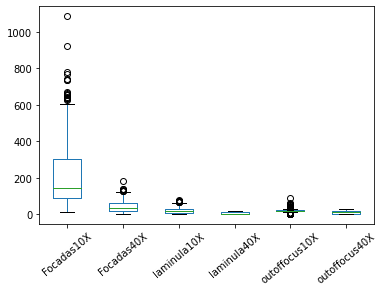

lower 5% values for Laplacian at in-sample focus at 10X: 44.43535817157426.
higher 95% values for Laplacian at coverslip focus at 10X: 52.535422827334465.
lower 5% values for Laplacian at in-sample focus at 40X: 8.502570681294861.
higher 95% values for Laplacian at coverslip focus at 40X: 2.592230484178378.


Showing results for CMSL


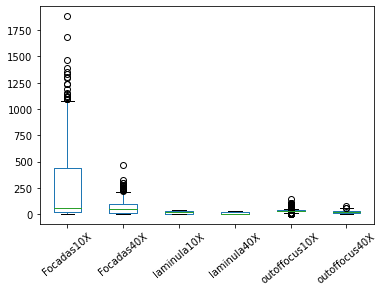

lower 5% values for CMSL at in-sample focus at 10X: 4.888888835906982.
higher 95% values for CMSL at coverslip focus at 10X: 33.783334159851066.
lower 5% values for CMSL at in-sample focus at 40X: 3.3333332538604736.
higher 95% values for CMSL at coverslip focus at 40X: 2.6666667461395264.


Showing results for SML


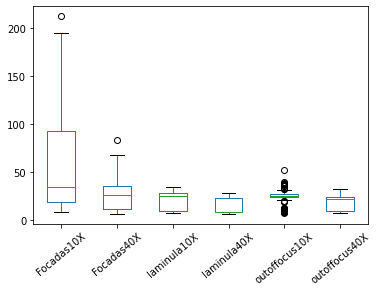

lower 5% values for SML at in-sample focus at 10X: 10.0.
higher 95% values for SML at coverslip focus at 10X: 31.0.
lower 5% values for SML at in-sample focus at 40X: 8.0.
higher 95% values for SML at coverslip focus at 40X: 7.0.


Showing results for GLV


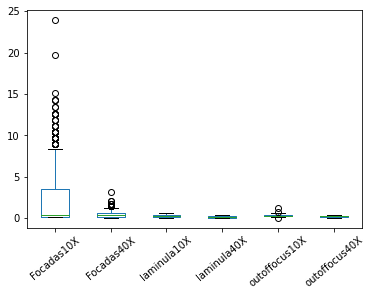

lower 5% values for GLV at in-sample focus at 10X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 10X: 0.44444130510091784.
lower 5% values for GLV at in-sample focus at 40X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 40X: 0.04938234016299248.




In [181]:
for method in dfzao.keys():
    print('Showing results for {}'.format(method))
    show_boxplot(dfzao[method])
    print('lower 5% values for {} at in-sample focus at 10X: {}.'.format(method, dfzao[method]['Focadas10X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 10X: {}.'.format(method, dfzao[method]['laminula10X'].quantile(q=0.95)))
    
    print('lower 5% values for {} at in-sample focus at 40X: {}.'.format(method, dfzao[method]['Focadas40X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 40X: {}.'.format(method, dfzao[method]['laminula40X'].quantile(q=0.05)))
    print('\n')

In [190]:
q_lam_95 = dfzao['Laplacian']['laminula10X'].quantile(q=0.95)
q_lam_max = dfzao['Laplacian']['laminula10X'].max()

print(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas10X'] > q_lam_95]) / len(dfzao['Laplacian']))
print(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas10X'] > q_lam_max]) / len(dfzao['Laplacian']))

0.8633217993079585
0.7352941176470589


In [191]:
q_lam_95 = dfzao['Laplacian']['laminula40X'].quantile(q=0.95)
q_lam_max = dfzao['Laplacian']['laminula40X'].max()

print(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas40X'] > q_lam_95]) / len(dfzao['Laplacian']))
print(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas40X'] > q_lam_max]) / len(dfzao['Laplacian']))

0.6955017301038062
0.6487889273356401


In [220]:
q_oof_95_10 = dfzao['Laplacian']['outoffocus10X'].quantile(q=0.95)
q_oof_max_10 = dfzao['Laplacian']['outoffocus10X'].max()

print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas10X'] > q_oof_95_10]) / len(dfzao['Laplacian'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas10X'] > q_oof_max_10]) / len(dfzao['Laplacian'])))

q_oof_95_40 = dfzao['Laplacian']['outoffocus40X'].quantile(q=0.95)
q_oof_max_40 = dfzao['Laplacian']['outoffocus40X'].max()
print('\n')
print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas40X'] > q_oof_95_40]) / len(dfzao['Laplacian'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(dfzao['Laplacian'][dfzao['Laplacian']['Focadas40X'] > q_oof_max_40]) / len(dfzao['Laplacian'])))

Using a 95% cutoff from the coverslide, we retain 0.916955017301038% focused images in 10X
Using a 100% cutoff from the coverslide, we retain 0.7093425605536332% focused images in 10X


Using a 95% cutoff from the coverslide, we retain 0.6851211072664359% focused images in 40X
Using a 100% cutoff from the coverslide, we retain 0.5190311418685121% focused images in 40X


In [202]:
five_nine = []
for path in os.listdir('output'):
    for key in methods[5:9]:
        if key in path:
            five_nine.append(path)
five_nine

['bulk_data_stack_171220_Focadas_10X__CalContrast_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__DSharpness_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__Jaehne_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__CalContrast_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__DSharpness_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_40X__Jaehne_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__CalContrast_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__DSharpness_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_10X__Jaehne_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_40X__CalContrast_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_40X__DSharpness_large_centroid_results.csv',
 'bulk_data_stack_171220_laminula_40X__Jaehne_large_centroid_results.csv',
 'bulk_data_stack_171220_out_of_focus_10X__CalContrast_large_centroid_

In [203]:
results = {}
for method in methods:
    current_res_paths = [path for path in five_nine if method in path]
    
    if current_res_paths:
        res, curr_df = get_df(current_res_paths)
        
        results[method] = curr_df
    

543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515


Showing results for Jaehne


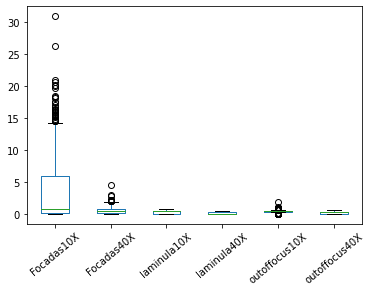

lower 5% values for Jaehne at in-sample focus at 10X: 0.1164794921875.
higher 95% values for Jaehne at coverslip focus at 10X: 0.6838500976562499.
lower 5% values for Jaehne at in-sample focus at 40X: 0.085205078125.
higher 95% values for Jaehne at coverslip focus at 40X: 0.07861328125.


Showing results for DSharpness


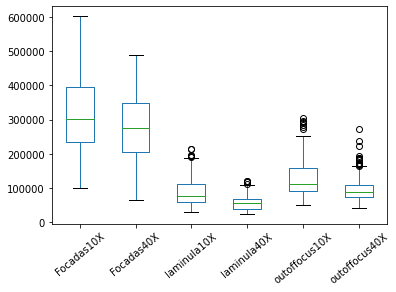

lower 5% values for DSharpness at in-sample focus at 10X: 164166.15411975668.
higher 95% values for DSharpness at coverslip focus at 10X: 153917.93730634026.
lower 5% values for DSharpness at in-sample focus at 40X: 127736.01795594458.
higher 95% values for DSharpness at coverslip focus at 40X: 30506.694609321334.


Showing results for CalContrast


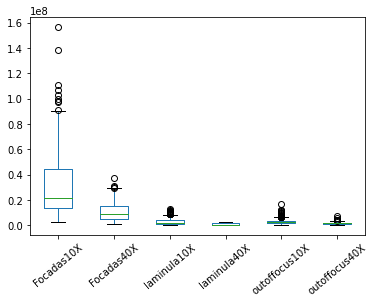

lower 5% values for CalContrast at in-sample focus at 10X: 6824505.100000001.
higher 95% values for CalContrast at coverslip focus at 10X: 7772897.149999996.
lower 5% values for CalContrast at in-sample focus at 40X: 2188270.1.
higher 95% values for CalContrast at coverslip focus at 40X: 252706.85.




In [206]:
for method in results.keys():
    print('Showing results for {}'.format(method))
    show_boxplot(results[method])
    print('lower 5% values for {} at in-sample focus at 10X: {}.'.format(method, results[method]['Focadas10X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 10X: {}.'.format(method, results[method]['laminula10X'].quantile(q=0.95)))
    
    print('lower 5% values for {} at in-sample focus at 40X: {}.'.format(method, results[method]['Focadas40X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 40X: {}.'.format(method, results[method]['laminula40X'].quantile(q=0.05)))
    print('\n')

In [215]:
q_lam_95_10 = results['DSharpness']['laminula10X'].quantile(q=0.95)
q_lam_max_10 = results['DSharpness']['laminula10X'].max()

print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_lam_95]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_lam_max]) / len(results['DSharpness'])))

q_lam_95_40 = results['DSharpness']['laminula40X'].quantile(q=0.95)
q_lam_max_40 = results['DSharpness']['laminula40X'].max()
print('\n')
print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_lam_95]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_lam_max]) / len(results['DSharpness'])))


Using a 95% cutoff from the coverslide, we retain 0.9394463667820069% focused images in 10X
Using a 100% cutoff from the coverslide, we retain 0.9359861591695502% focused images in 10X


Using a 95% cutoff from the coverslide, we retain 0.8667820069204152% focused images in 40X
Using a 100% cutoff from the coverslide, we retain 0.8442906574394463% focused images in 40X


In [218]:
q_oof_95_10 = results['DSharpness']['outoffocus10X'].quantile(q=0.95)
q_oof_max_10 = results['DSharpness']['outoffocus10X'].max()

print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_oof_95_10]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_oof_max_10]) / len(results['DSharpness'])))

q_oof_95_40 = results['DSharpness']['outoffocus40X'].quantile(q=0.95)
q_oof_max_40 = results['DSharpness']['outoffocus40X'].max()
print('\n')
print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_oof_95_40]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_oof_max_40]) / len(results['DSharpness'])))

Using a 95% cutoff from the coverslide, we retain 0.7560553633217993% focused images in 10X
Using a 100% cutoff from the coverslide, we retain 0.45674740484429066% focused images in 10X


Using a 95% cutoff from the coverslide, we retain 0.7906574394463668% focused images in 40X
Using a 100% cutoff from the coverslide, we retain 0.444636678200692% focused images in 40X


In [224]:
focal_squares_paths = [path for path in os.listdir('output') if  'focal_squares' in path]
focal_squares_paths

['bulk_data_stack_171220_Focadas_10X__CalContrast_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CMSL_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__DSharpness_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__FastFourier_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__GLV_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__Jaehne_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__JpegSize_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__Laplacian_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__RingDifference_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__SML_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__Tenengrad_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_40X__CalContrast_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_40X__CMSL_focal_squares_results.csv',
 'bulk_data_stack_171220_F

In [225]:
results = {}
for method in methods:
    current_res_paths = [path for path in focal_squares_paths if method in path]
    
    if current_res_paths:
        res, curr_df = get_df(current_res_paths)
        
        results[method] = curr_df
    

543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515


In [226]:
results

{'JpegSize':      Focadas10X  Focadas40X  laminula10X  laminula40X  outoffocus10X  \
 0        1375.0      1300.0       1209.0        868.0         1303.0   
 1        1237.0      1456.0       1223.0        864.0         1352.0   
 2        1080.0      1176.0       1226.0        882.0         1211.0   
 3        1344.0       972.0        922.0        847.0         1445.0   
 4        1197.0      1036.0        853.0        873.0         1399.0   
 ..          ...         ...          ...          ...            ...   
 573         NaN         NaN          NaN        844.0            NaN   
 574         NaN         NaN          NaN        881.0            NaN   
 575         NaN         NaN          NaN        879.0            NaN   
 576         NaN         NaN          NaN        894.0            NaN   
 577         NaN         NaN          NaN        876.0            NaN   
 
      outoffocus40X  
 0            955.0  
 1           1009.0  
 2            955.0  
 3           1013.0  


Showing results for JpegSize


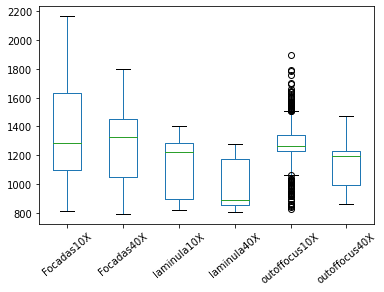

lower 5% values for JpegSize at in-sample focus at 10X: 922.0.
higher 95% values for JpegSize at coverslip focus at 10X: 1334.0.
lower 5% values for JpegSize at in-sample focus at 40X: 874.7.
higher 95% values for JpegSize at coverslip focus at 40X: 826.85.


Showing results for Laplacian


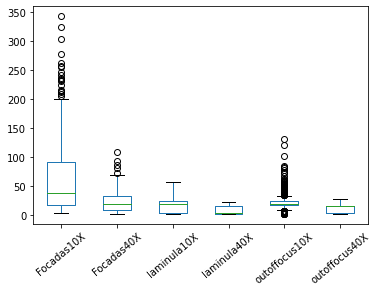

lower 5% values for Laplacian at in-sample focus at 10X: 6.091000286672667.
higher 95% values for Laplacian at coverslip focus at 10X: 35.46432939880306.
lower 5% values for Laplacian at in-sample focus at 40X: 3.2234714344677595.
higher 95% values for Laplacian at coverslip focus at 40X: 2.545053648051102.


Showing results for CMSL


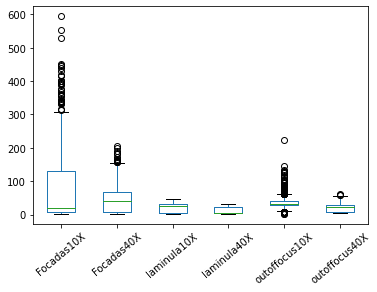

lower 5% values for CMSL at in-sample focus at 10X: 3.3333332538604736.
higher 95% values for CMSL at coverslip focus at 10X: 35.77777862548828.
lower 5% values for CMSL at in-sample focus at 40X: 3.1500000715255743.
higher 95% values for CMSL at coverslip focus at 40X: 2.6666667461395264.


Showing results for GLV


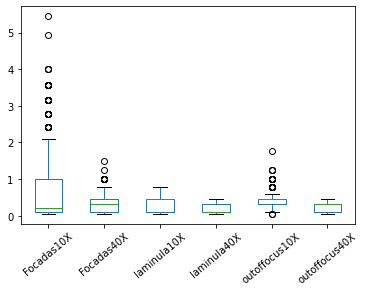

lower 5% values for GLV at in-sample focus at 10X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 10X: 0.6049395799636841.
lower 5% values for GLV at in-sample focus at 40X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 40X: 0.04938234016299248.


Showing results for Tenengrad


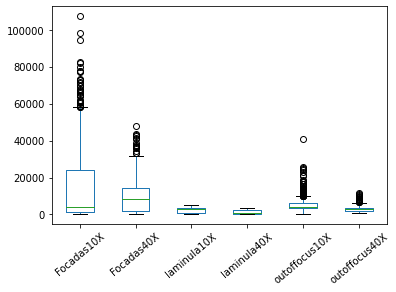

lower 5% values for Tenengrad at in-sample focus at 10X: 566.2.
higher 95% values for Tenengrad at coverslip focus at 10X: 4084.4999999999995.
lower 5% values for Tenengrad at in-sample focus at 40X: 532.7.
higher 95% values for Tenengrad at coverslip focus at 40X: 390.0.


Showing results for Jaehne


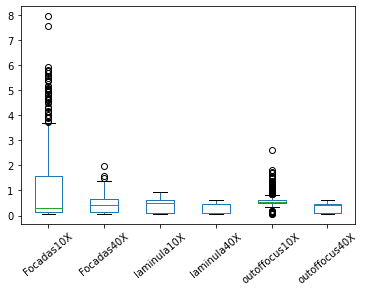

lower 5% values for Jaehne at in-sample focus at 10X: 0.08720703125.
higher 95% values for Jaehne at coverslip focus at 10X: 0.7241455078125.
lower 5% values for Jaehne at in-sample focus at 40X: 0.08309326171875.
higher 95% values for Jaehne at coverslip focus at 40X: 0.07958984375.


Showing results for DSharpness


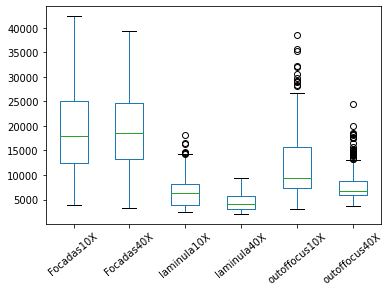

lower 5% values for DSharpness at in-sample focus at 10X: 7340.806885000341.
higher 95% values for DSharpness at coverslip focus at 10X: 11641.196118692806.
lower 5% values for DSharpness at in-sample focus at 40X: 5749.403610110494.
higher 95% values for DSharpness at coverslip focus at 40X: 2464.781802026924.


Showing results for CalContrast


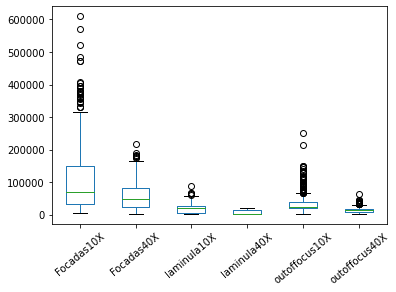

lower 5% values for CalContrast at in-sample focus at 10X: 11043.300000000001.
higher 95% values for CalContrast at coverslip focus at 10X: 42218.299999999996.
lower 5% values for CalContrast at in-sample focus at 40X: 5838.75.
higher 95% values for CalContrast at coverslip focus at 40X: 2404.7.


Showing results for FastFourier


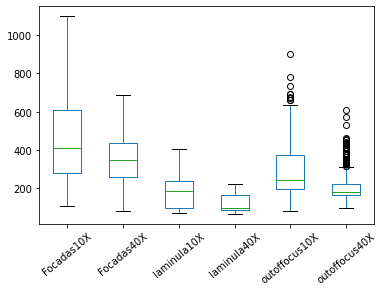

lower 5% values for FastFourier at in-sample focus at 10X: 159.7688419711065.
higher 95% values for FastFourier at coverslip focus at 10X: 283.6003933541521.
lower 5% values for FastFourier at in-sample focus at 40X: 115.24764974740282.
higher 95% values for FastFourier at coverslip focus at 40X: 77.98282263450554.


Showing results for RingDifference


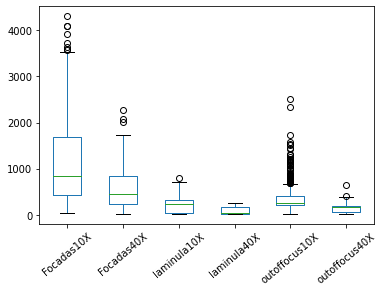

lower 5% values for RingDifference at in-sample focus at 10X: 124.13829531199396.
higher 95% values for RingDifference at coverslip focus at 10X: 504.9452300053256.
lower 5% values for RingDifference at in-sample focus at 40X: 43.47124973803536.
higher 95% values for RingDifference at coverslip focus at 40X: 19.889322371527182.




In [227]:
for method in results.keys():
    print('Showing results for {}'.format(method))
    show_boxplot(results[method])
    print('lower 5% values for {} at in-sample focus at 10X: {}.'.format(method, results[method]['Focadas10X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 10X: {}.'.format(method, results[method]['laminula10X'].quantile(q=0.95)))
    
    print('lower 5% values for {} at in-sample focus at 40X: {}.'.format(method, results[method]['Focadas40X'].quantile(q=0.05)))
    print('higher 95% values for {} at coverslip focus at 40X: {}.'.format(method, results[method]['laminula40X'].quantile(q=0.05)))
    print('\n')

In [246]:
q_lam_95_10 = results['DSharpness']['laminula10X'].quantile(q=0.95)
q_lam_max_10 = results['DSharpness']['laminula10X'].max()

print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_lam_95_10]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 10X'.format(len(results['DSharpness'][results['DSharpness']['Focadas10X'] > q_lam_max_10]) / len(results['DSharpness'])))

q_lam_95_40 = results['DSharpness']['laminula40X'].quantile(q=0.95)
q_lam_max_40 = results['DSharpness']['laminula40X'].max()
print('\n')
print('Using a 95% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_lam_95_40]) / len(results['DSharpness'])))
print('Using a 100% cutoff from the coverslide, we retain {}% focused images in 40X'.format(len(results['DSharpness'][results['DSharpness']['Focadas40X'] > q_lam_max_40]) / len(results['DSharpness'])))


Using a 95% cutoff from the coverslide, we retain 0.740484429065744% focused images in 10X
Using a 100% cutoff from the coverslide, we retain 0.46366782006920415% focused images in 10X


Using a 95% cutoff from the coverslide, we retain 0.8096885813148789% focused images in 40X
Using a 100% cutoff from the coverslide, we retain 0.7525951557093425% focused images in 40X


In [247]:
os.listdir('output')

['all_stacks_10.pickle',
 'all_stacks_40.pickle',
 'Between_Stacks_Comparison_10_RingDiff.png',
 'Between_Stacks_Comparison_40_RingDiff.png',
 'bulk_data_stack_171220_Focadas_10X__CalContrast_central_point_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CalContrast_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CalContrast_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CalContrast__results.csv',
 'bulk_data_stack_171220_Focadas_10X__CMSL_central_point_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CMSL_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CMSL_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__CMSL__results.csv',
 'bulk_data_stack_171220_Focadas_10X__DetectLines_large_centroid_results.csv',
 'bulk_data_stack_171220_Focadas_10X__DSharpness_central_point_results.csv',
 'bulk_data_stack_171220_Focadas_10X__DSharpness_focal_squares_results.csv',
 'bulk_data_stack_171220_Focadas_10X__DSharpness_larg

In [248]:
def load_df(sampling_method):
    res_paths = [path for path in os.listdir('output') if  sampling_method in path]

    results = {}
    for method in methods:
        current_res_paths = [path for path in focal_squares_paths if method in path]
    
        if current_res_paths:
            res, curr_df = get_df(current_res_paths)
        
            results[method] = curr_df
            
    return results
    

In [249]:
results = load_df('central_point')

543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515


In [250]:
def plot_boxplots(df):
    for method in results.keys():
        print('Showing results for {}'.format(method))
        show_boxplot(results[method])
        print('lower 5% values for {} at in-sample focus at 10X: {}.'.format(method, results[method]['Focadas10X'].quantile(q=0.05)))
        print('higher 95% values for {} at coverslip focus at 10X: {}.'.format(method, results[method]['laminula10X'].quantile(q=0.95)))

        print('lower 5% values for {} at in-sample focus at 40X: {}.'.format(method, results[method]['Focadas40X'].quantile(q=0.05)))
        print('higher 95% values for {} at coverslip focus at 40X: {}.'.format(method, results[method]['laminula40X'].quantile(q=0.05)))
        print('\n')

Showing results for JpegSize


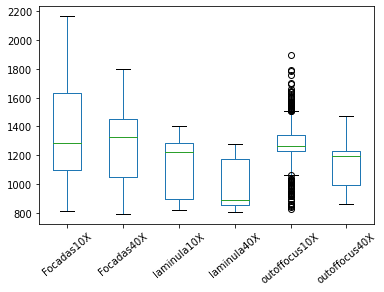

lower 5% values for JpegSize at in-sample focus at 10X: 922.0.
higher 95% values for JpegSize at coverslip focus at 10X: 1334.0.
lower 5% values for JpegSize at in-sample focus at 40X: 874.7.
higher 95% values for JpegSize at coverslip focus at 40X: 826.85.


Showing results for Laplacian


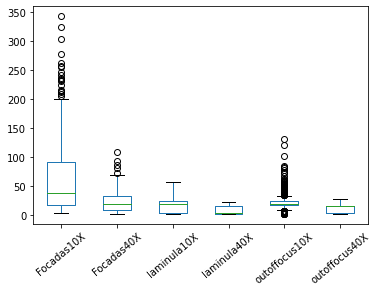

lower 5% values for Laplacian at in-sample focus at 10X: 6.091000286672667.
higher 95% values for Laplacian at coverslip focus at 10X: 35.46432939880306.
lower 5% values for Laplacian at in-sample focus at 40X: 3.2234714344677595.
higher 95% values for Laplacian at coverslip focus at 40X: 2.545053648051102.


Showing results for CMSL


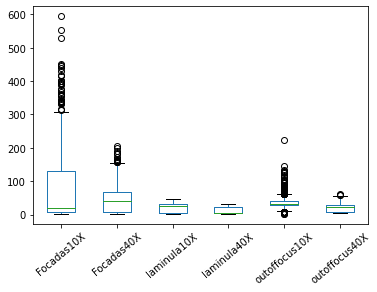

lower 5% values for CMSL at in-sample focus at 10X: 3.3333332538604736.
higher 95% values for CMSL at coverslip focus at 10X: 35.77777862548828.
lower 5% values for CMSL at in-sample focus at 40X: 3.1500000715255743.
higher 95% values for CMSL at coverslip focus at 40X: 2.6666667461395264.


Showing results for GLV


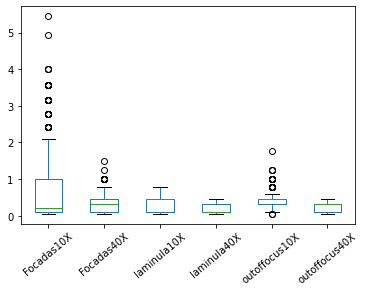

lower 5% values for GLV at in-sample focus at 10X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 10X: 0.6049395799636841.
lower 5% values for GLV at in-sample focus at 40X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 40X: 0.04938234016299248.


Showing results for Tenengrad


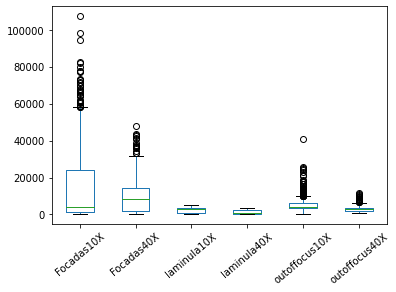

lower 5% values for Tenengrad at in-sample focus at 10X: 566.2.
higher 95% values for Tenengrad at coverslip focus at 10X: 4084.4999999999995.
lower 5% values for Tenengrad at in-sample focus at 40X: 532.7.
higher 95% values for Tenengrad at coverslip focus at 40X: 390.0.


Showing results for Jaehne


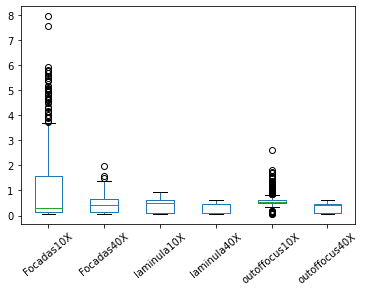

lower 5% values for Jaehne at in-sample focus at 10X: 0.08720703125.
higher 95% values for Jaehne at coverslip focus at 10X: 0.7241455078125.
lower 5% values for Jaehne at in-sample focus at 40X: 0.08309326171875.
higher 95% values for Jaehne at coverslip focus at 40X: 0.07958984375.


Showing results for DSharpness


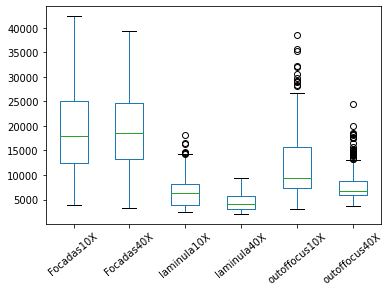

lower 5% values for DSharpness at in-sample focus at 10X: 7340.806885000341.
higher 95% values for DSharpness at coverslip focus at 10X: 11641.196118692806.
lower 5% values for DSharpness at in-sample focus at 40X: 5749.403610110494.
higher 95% values for DSharpness at coverslip focus at 40X: 2464.781802026924.


Showing results for CalContrast


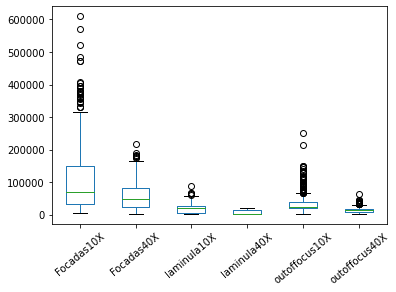

lower 5% values for CalContrast at in-sample focus at 10X: 11043.300000000001.
higher 95% values for CalContrast at coverslip focus at 10X: 42218.299999999996.
lower 5% values for CalContrast at in-sample focus at 40X: 5838.75.
higher 95% values for CalContrast at coverslip focus at 40X: 2404.7.


Showing results for FastFourier


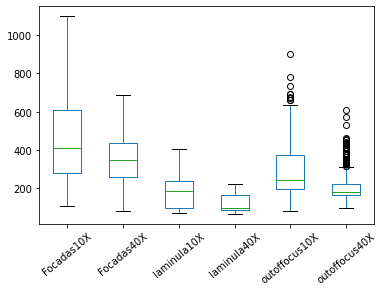

lower 5% values for FastFourier at in-sample focus at 10X: 159.7688419711065.
higher 95% values for FastFourier at coverslip focus at 10X: 283.6003933541521.
lower 5% values for FastFourier at in-sample focus at 40X: 115.24764974740282.
higher 95% values for FastFourier at coverslip focus at 40X: 77.98282263450554.


Showing results for RingDifference


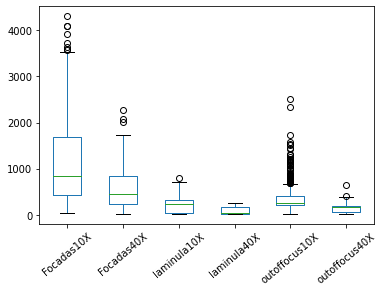

lower 5% values for RingDifference at in-sample focus at 10X: 124.13829531199396.
higher 95% values for RingDifference at coverslip focus at 10X: 504.9452300053256.
lower 5% values for RingDifference at in-sample focus at 40X: 43.47124973803536.
higher 95% values for RingDifference at coverslip focus at 40X: 19.889322371527182.




In [251]:
plot_boxplots(results)

In [273]:
def compare_cutoff(df, method, class_one, class_two):
    class_two_95 = df[method][class_two].quantile(q=0.95)
    class_two_max = df[method][class_two].max()
    n_class_one = len(df[method][class_one])
    
    percent_95 = len(df[method][class_one][df[method][class_one] > class_two_95]) / n_class_one
    percent_100 = len(df[method][class_one][df[method][class_one] > class_two_max]) / n_class_one
    
    
    print('Using a 95% cutoff from the {}, we retain {}% {} images'.format(class_two, percent_95, class_one))
    print('Using a 100% cutoff from the {}, we retain {}% {} images'.format(class_two, percent_100, class_one))

In [279]:
compare_cutoff(results, 'DSharpness', 'Focadas10X', 'laminula10X')

print('\n')

compare_cutoff(results, 'DSharpness', 'Focadas40X', 'laminula40X')

Using a 95% cutoff from the laminula10X, we retain 0.740484429065744% Focadas10X images
Using a 100% cutoff from the laminula10X, we retain 0.46366782006920415% Focadas10X images


Using a 95% cutoff from the laminula40X, we retain 0.8096885813148789% Focadas40X images
Using a 100% cutoff from the laminula40X, we retain 0.7525951557093425% Focadas40X images


In [280]:
compare_cutoff(results, 'DSharpness', 'Focadas10X', 'outoffocus10X')

print('\n')

compare_cutoff(results, 'DSharpness', 'Focadas40X', 'outoffocus40X')

Using a 95% cutoff from the outoffocus10X, we retain 0.24740484429065743% Focadas10X images
Using a 100% cutoff from the outoffocus10X, we retain 0.006920415224913495% Focadas10X images


Using a 95% cutoff from the outoffocus40X, we retain 0.6522491349480969% Focadas40X images
Using a 100% cutoff from the outoffocus40X, we retain 0.22837370242214533% Focadas40X images


In [281]:
compare_cutoff(results, 'Laplacian', 'Focadas10X', 'laminula10X')

print('\n')

compare_cutoff(results, 'Laplacian', 'Focadas40X', 'laminula40X')

Using a 95% cutoff from the laminula10X, we retain 0.48961937716262977% Focadas10X images
Using a 100% cutoff from the laminula10X, we retain 0.3477508650519031% Focadas10X images


Using a 95% cutoff from the laminula40X, we retain 0.4826989619377163% Focadas40X images
Using a 100% cutoff from the laminula40X, we retain 0.3788927335640138% Focadas40X images


In [282]:
compare_cutoff(results, 'Laplacian', 'Focadas10X', 'outoffocus10X')

print('\n')

compare_cutoff(results, 'Laplacian', 'Focadas40X', 'outoffocus40X')

Using a 95% cutoff from the outoffocus10X, we retain 0.3771626297577855% Focadas10X images
Using a 100% cutoff from the outoffocus10X, we retain 0.12110726643598616% Focadas10X images


Using a 95% cutoff from the outoffocus40X, we retain 0.47750865051903113% Focadas40X images
Using a 100% cutoff from the outoffocus40X, we retain 0.2975778546712803% Focadas40X images


In [284]:
full_pic_res = load_df('__results.csv')

543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515


Showing results for JpegSize


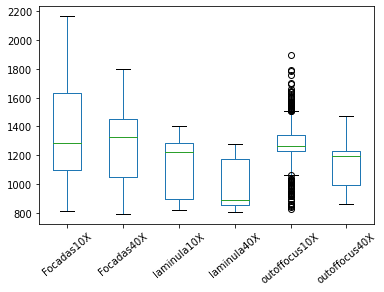

lower 5% values for JpegSize at in-sample focus at 10X: 922.0.
higher 95% values for JpegSize at coverslip focus at 10X: 1334.0.
lower 5% values for JpegSize at in-sample focus at 40X: 874.7.
higher 95% values for JpegSize at coverslip focus at 40X: 826.85.


Showing results for Laplacian


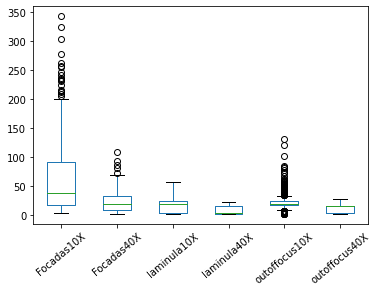

lower 5% values for Laplacian at in-sample focus at 10X: 6.091000286672667.
higher 95% values for Laplacian at coverslip focus at 10X: 35.46432939880306.
lower 5% values for Laplacian at in-sample focus at 40X: 3.2234714344677595.
higher 95% values for Laplacian at coverslip focus at 40X: 2.545053648051102.


Showing results for CMSL


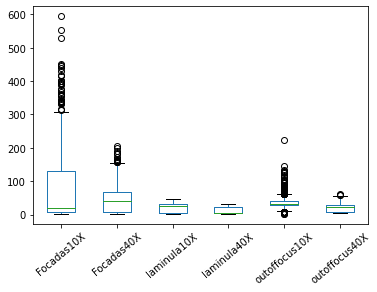

lower 5% values for CMSL at in-sample focus at 10X: 3.3333332538604736.
higher 95% values for CMSL at coverslip focus at 10X: 35.77777862548828.
lower 5% values for CMSL at in-sample focus at 40X: 3.1500000715255743.
higher 95% values for CMSL at coverslip focus at 40X: 2.6666667461395264.


Showing results for GLV


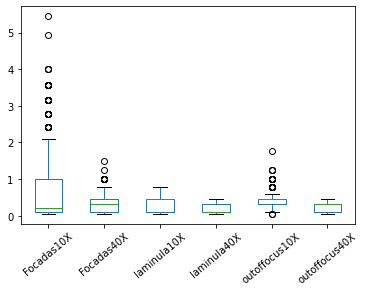

lower 5% values for GLV at in-sample focus at 10X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 10X: 0.6049395799636841.
lower 5% values for GLV at in-sample focus at 40X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 40X: 0.04938234016299248.


Showing results for Tenengrad


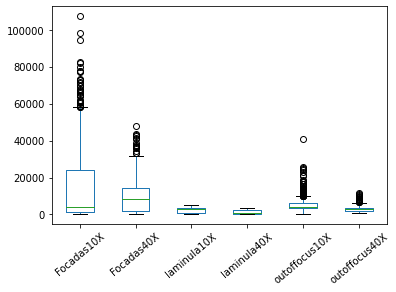

lower 5% values for Tenengrad at in-sample focus at 10X: 566.2.
higher 95% values for Tenengrad at coverslip focus at 10X: 4084.4999999999995.
lower 5% values for Tenengrad at in-sample focus at 40X: 532.7.
higher 95% values for Tenengrad at coverslip focus at 40X: 390.0.


Showing results for Jaehne


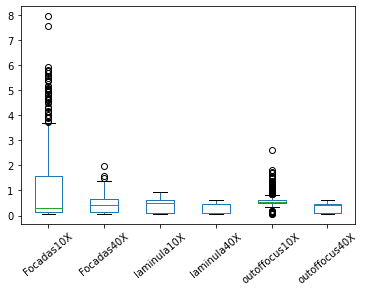

lower 5% values for Jaehne at in-sample focus at 10X: 0.08720703125.
higher 95% values for Jaehne at coverslip focus at 10X: 0.7241455078125.
lower 5% values for Jaehne at in-sample focus at 40X: 0.08309326171875.
higher 95% values for Jaehne at coverslip focus at 40X: 0.07958984375.


Showing results for DSharpness


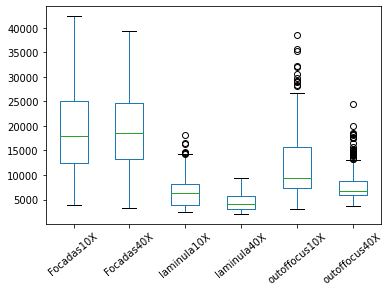

lower 5% values for DSharpness at in-sample focus at 10X: 7340.806885000341.
higher 95% values for DSharpness at coverslip focus at 10X: 11641.196118692806.
lower 5% values for DSharpness at in-sample focus at 40X: 5749.403610110494.
higher 95% values for DSharpness at coverslip focus at 40X: 2464.781802026924.


Showing results for CalContrast


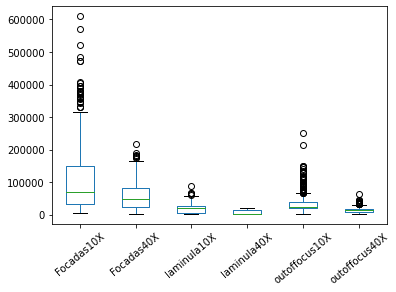

lower 5% values for CalContrast at in-sample focus at 10X: 11043.300000000001.
higher 95% values for CalContrast at coverslip focus at 10X: 42218.299999999996.
lower 5% values for CalContrast at in-sample focus at 40X: 5838.75.
higher 95% values for CalContrast at coverslip focus at 40X: 2404.7.


Showing results for FastFourier


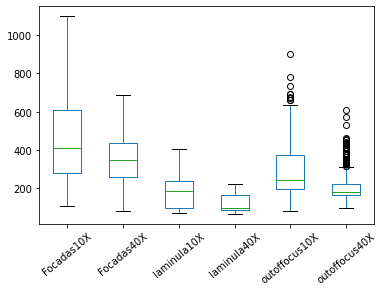

lower 5% values for FastFourier at in-sample focus at 10X: 159.7688419711065.
higher 95% values for FastFourier at coverslip focus at 10X: 283.6003933541521.
lower 5% values for FastFourier at in-sample focus at 40X: 115.24764974740282.
higher 95% values for FastFourier at coverslip focus at 40X: 77.98282263450554.


Showing results for RingDifference


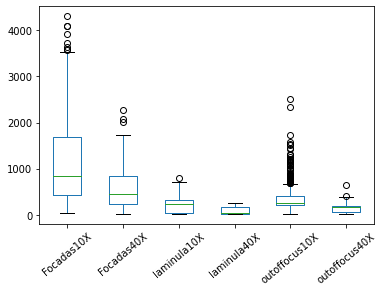

lower 5% values for RingDifference at in-sample focus at 10X: 124.13829531199396.
higher 95% values for RingDifference at coverslip focus at 10X: 504.9452300053256.
lower 5% values for RingDifference at in-sample focus at 40X: 43.47124973803536.
higher 95% values for RingDifference at coverslip focus at 40X: 19.889322371527182.




In [285]:
plot_boxplots(full_pic_res)

In [286]:
compare_cutoff(full_pic_res, 'DSharpness', 'Focadas10X', 'laminula10X')

Using a 95% cutoff from the laminula10X, we retain 0.740484429065744% Focadas10X images
Using a 100% cutoff from the laminula10X, we retain 0.46366782006920415% Focadas10X images


In [287]:
compare_cutoff(full_pic_res, 'DSharpness', 'Focadas40X', 'laminula40X')

Using a 95% cutoff from the laminula40X, we retain 0.8096885813148789% Focadas40X images
Using a 100% cutoff from the laminula40X, we retain 0.7525951557093425% Focadas40X images


In [288]:
compare_cutoff(full_pic_res, 'Laplacian', 'Focadas10X', 'outoffocus10X')

Using a 95% cutoff from the outoffocus10X, we retain 0.3771626297577855% Focadas10X images
Using a 100% cutoff from the outoffocus10X, we retain 0.12110726643598616% Focadas10X images


In [289]:
compare_cutoff(full_pic_res, 'Laplacian', 'Focadas40X', 'outoffocus40X')

Using a 95% cutoff from the outoffocus40X, we retain 0.47750865051903113% Focadas40X images
Using a 100% cutoff from the outoffocus40X, we retain 0.2975778546712803% Focadas40X images


In [290]:
compare_cutoff(full_pic_res, 'RingDifference', 'Focadas10X', 'outoffocus10X')

Using a 95% cutoff from the outoffocus10X, we retain 0.41522491349480967% Focadas10X images
Using a 100% cutoff from the outoffocus10X, we retain 0.08996539792387544% Focadas10X images


In [291]:
compare_cutoff(full_pic_res, 'RingDifference', 'Focadas10X', 'outoffocus40X')

Using a 95% cutoff from the outoffocus40X, we retain 0.8339100346020761% Focadas10X images
Using a 100% cutoff from the outoffocus40X, we retain 0.5605536332179931% Focadas10X images


In [294]:
lc_res = load_df('large_centroid')

543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515
543
508
500
578
501
515


Showing results for JpegSize


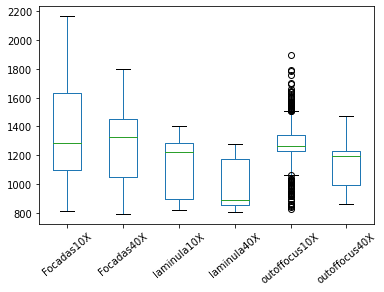

lower 5% values for JpegSize at in-sample focus at 10X: 922.0.
higher 95% values for JpegSize at coverslip focus at 10X: 1334.0.
lower 5% values for JpegSize at in-sample focus at 40X: 874.7.
higher 95% values for JpegSize at coverslip focus at 40X: 826.85.


Showing results for Laplacian


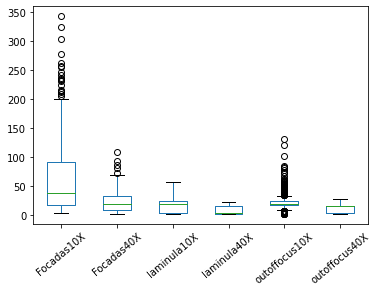

lower 5% values for Laplacian at in-sample focus at 10X: 6.091000286672667.
higher 95% values for Laplacian at coverslip focus at 10X: 35.46432939880306.
lower 5% values for Laplacian at in-sample focus at 40X: 3.2234714344677595.
higher 95% values for Laplacian at coverslip focus at 40X: 2.545053648051102.


Showing results for CMSL


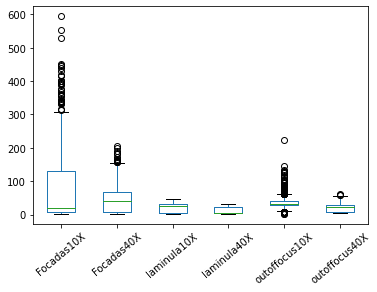

lower 5% values for CMSL at in-sample focus at 10X: 3.3333332538604736.
higher 95% values for CMSL at coverslip focus at 10X: 35.77777862548828.
lower 5% values for CMSL at in-sample focus at 40X: 3.1500000715255743.
higher 95% values for CMSL at coverslip focus at 40X: 2.6666667461395264.


Showing results for GLV


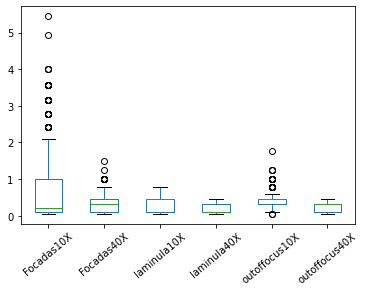

lower 5% values for GLV at in-sample focus at 10X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 10X: 0.6049395799636841.
lower 5% values for GLV at in-sample focus at 40X: 0.1111128032207489.
higher 95% values for GLV at coverslip focus at 40X: 0.04938234016299248.


Showing results for Tenengrad


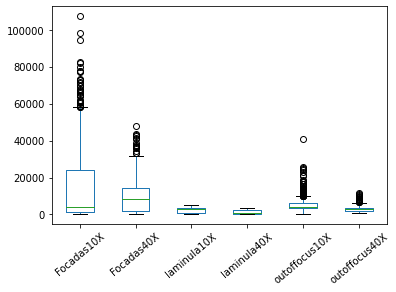

lower 5% values for Tenengrad at in-sample focus at 10X: 566.2.
higher 95% values for Tenengrad at coverslip focus at 10X: 4084.4999999999995.
lower 5% values for Tenengrad at in-sample focus at 40X: 532.7.
higher 95% values for Tenengrad at coverslip focus at 40X: 390.0.


Showing results for Jaehne


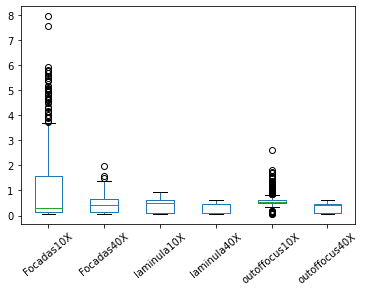

lower 5% values for Jaehne at in-sample focus at 10X: 0.08720703125.
higher 95% values for Jaehne at coverslip focus at 10X: 0.7241455078125.
lower 5% values for Jaehne at in-sample focus at 40X: 0.08309326171875.
higher 95% values for Jaehne at coverslip focus at 40X: 0.07958984375.


Showing results for DSharpness


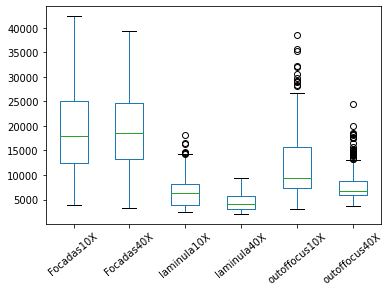

lower 5% values for DSharpness at in-sample focus at 10X: 7340.806885000341.
higher 95% values for DSharpness at coverslip focus at 10X: 11641.196118692806.
lower 5% values for DSharpness at in-sample focus at 40X: 5749.403610110494.
higher 95% values for DSharpness at coverslip focus at 40X: 2464.781802026924.


Showing results for CalContrast


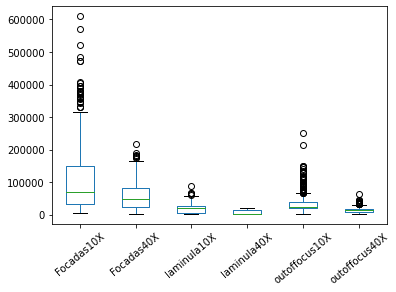

lower 5% values for CalContrast at in-sample focus at 10X: 11043.300000000001.
higher 95% values for CalContrast at coverslip focus at 10X: 42218.299999999996.
lower 5% values for CalContrast at in-sample focus at 40X: 5838.75.
higher 95% values for CalContrast at coverslip focus at 40X: 2404.7.


Showing results for FastFourier


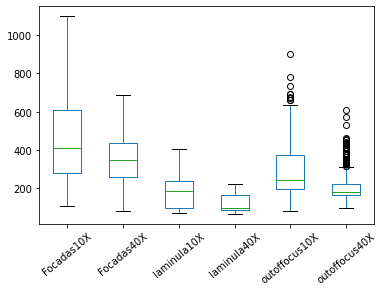

lower 5% values for FastFourier at in-sample focus at 10X: 159.7688419711065.
higher 95% values for FastFourier at coverslip focus at 10X: 283.6003933541521.
lower 5% values for FastFourier at in-sample focus at 40X: 115.24764974740282.
higher 95% values for FastFourier at coverslip focus at 40X: 77.98282263450554.


Showing results for RingDifference


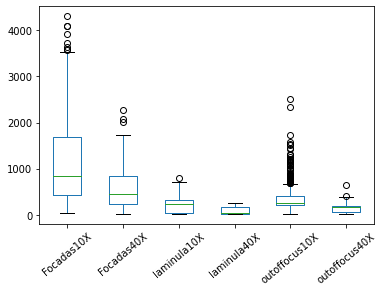

lower 5% values for RingDifference at in-sample focus at 10X: 124.13829531199396.
higher 95% values for RingDifference at coverslip focus at 10X: 504.9452300053256.
lower 5% values for RingDifference at in-sample focus at 40X: 43.47124973803536.
higher 95% values for RingDifference at coverslip focus at 40X: 19.889322371527182.




In [295]:
plot_boxplots(lc_res)

In [297]:
len(results['Laplacian']['Focadas10X'])

578

In [298]:
len(results['Laplacian']['Focadas40X'])

578